# Task
Compare the performance of a Neural Network (NN) and a Convolutional Neural Network (CNN) for image classification on the Fashion MNIST dataset.

## Load the dataset

### Subtask:
Load the Fashion MNIST dataset and split it into training and testing sets.


**Reasoning**:
Load the Fashion MNIST dataset and split it into training and testing sets as instructed.



In [31]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


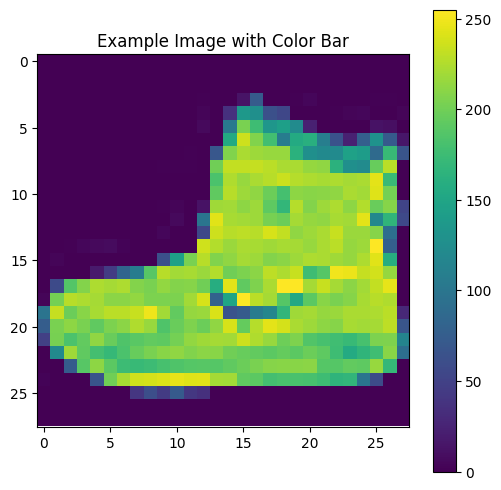

In [32]:
import matplotlib.pyplot as plt

# Select an image to display (e.g., the first image from the training set)
image_to_display = x_train[0]

plt.figure(figsize=(6, 6))
plt.imshow(image_to_display)
plt.colorbar() # Add the color bar
plt.title("Example Image with Color Bar")
plt.show()

## Data preprocessing

### Subtask:
Preprocess the image data for both the Neural Network (NN) and Convolutional Neural Network (CNN) models.


**Reasoning**:
Preprocess the image data by normalizing, reshaping for NN and CNN, and one-hot encoding the labels as per the instructions.



In [33]:
# Normalize the image data
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Reshape data for Neural Network (flatten)
x_train_nn = x_train_normalized.reshape((x_train_normalized.shape[0], -1))
x_test_nn = x_test_normalized.reshape((x_test_normalized.shape[0], -1))

# Reshape data for Convolutional Neural Network (add channel dimension)
x_train_cnn = x_train_normalized.reshape((x_train_normalized.shape[0], 28, 28, 1))
x_test_cnn = x_test_normalized.reshape((x_test_normalized.shape[0], 28, 28, 1))

# One-hot encode the target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Data preprocessing complete.")
print(f"x_train_nn shape: {x_train_nn.shape}")
print(f"x_test_nn shape: {x_test_nn.shape}")
print(f"x_train_cnn shape: {x_train_cnn.shape}")
print(f"x_test_cnn shape: {x_test_cnn.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

Data preprocessing complete.
x_train_nn shape: (60000, 784)
x_test_nn shape: (10000, 784)
x_train_cnn shape: (60000, 28, 28, 1)
x_test_cnn shape: (10000, 28, 28, 1)
y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


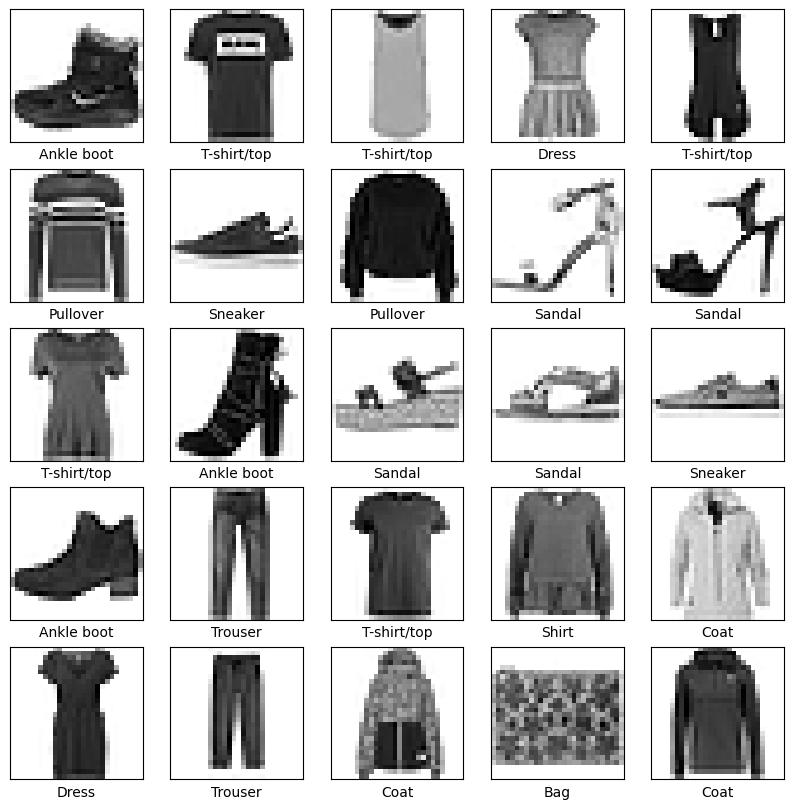

In [34]:
import matplotlib.pyplot as plt

# Define the class names (Fashion MNIST has 10 classes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_normalized[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Build and train the nn model

### Subtask:
Define, compile, and train a Neural Network model on the preprocessed data.


**Reasoning**:
I will now define, compile, and train the Neural Network model as per the instructions. This involves creating a `Sequential` model with an `Input` layer, a `Dense` hidden layer with 'relu' activation, and an output `Dense` layer with 'softmax' activation. The model will then be compiled with the 'adam' optimizer and 'categorical_crossentropy' loss function. Finally, the model will be trained on the preprocessed training data (`x_train_nn`, `y_train_encoded`) and validated on the test data (`x_test_nn`, `y_test_encoded`), and the training history will be stored.



In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Define the Neural Network model
nn_model = Sequential([
    Input(shape=(784,)),

    # Dense(512),
    # BatchNormalization(),
    # Activation('relu'),
    # LeakyReLU(alpha=0.02),
    # Dropout(0.2),

    # Dense(256),
    # BatchNormalization(),
    # Activation('relu'),
    # LeakyReLU(alpha=0.01),
    # Dropout(0.3),

    Dense(128),
    # BatchNormalization(),
    # Activation('relu'),
    LeakyReLU(alpha=0.05),
    Dropout(0.3),

    Dense(64),
    # BatchNormalization(),
    # Activation('relu'),
    LeakyReLU(alpha=0.05),
    Dropout(0.3),

    Dense(10),
    Activation('softmax')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
nn_model.summary()

# Plot the CNN model
plot_model(nn_model, show_shapes=True, show_layer_names=True)

# Train the model
nn_history = nn_model.fit(x_train_nn, y_train_encoded,
                          epochs=30,
                          batch_size=64,
                          validation_split=0.2)

print("Neural Network model training complete.")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6732 - loss: 0.9091 - val_accuracy: 0.8366 - val_loss: 0.4370
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8272 - loss: 0.4805 - val_accuracy: 0.8572 - val_loss: 0.3971
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8431 - loss: 0.4359 - val_accuracy: 0.8586 - val_loss: 0.3808
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8546 - loss: 0.4031 - val_accuracy: 0.8626 - val_loss: 0.3687
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8608 - loss: 0.3901 - val_accuracy: 0.8611 - val_loss: 0.3820
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8642 - loss: 0.3755 - val_accuracy: 0.8740 - val_loss: 0.3500
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8691 - loss: 0.3637 - val_accuracy: 0.8783 - val_loss: 0.3395
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8704 - loss: 0.3547 - val_accuracy: 0.

In [36]:
# Evaluate the model
nn_test_loss, nn_test_accuracy = nn_model.evaluate(x_test_nn, y_test_encoded)
print(f"Neural Network model test loss: {nn_test_loss}")
print(f"Neural Network model test accuracy: {nn_test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8852 - loss: 0.3430
Neural Network model test loss: 0.3440462052822113
Neural Network model test accuracy: 0.8833000063896179


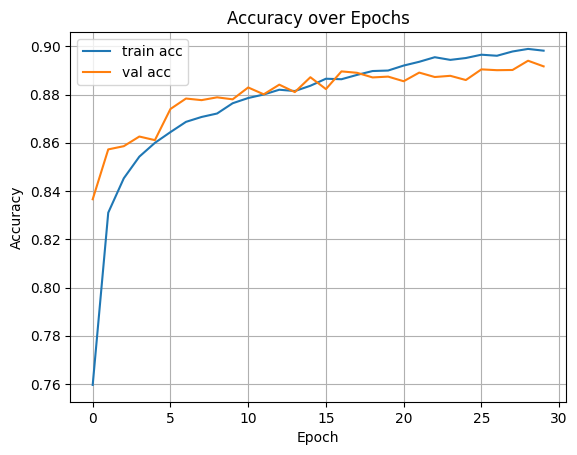

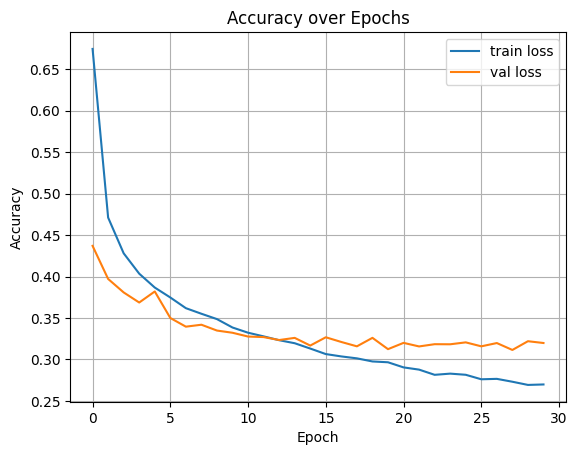

In [37]:
import matplotlib.pyplot as plt
plt.plot(nn_history.history['accuracy'], label='train acc')
plt.plot(nn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(nn_history.history['loss'], label='train loss')
plt.plot(nn_history.history['val_loss'], label='val loss')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


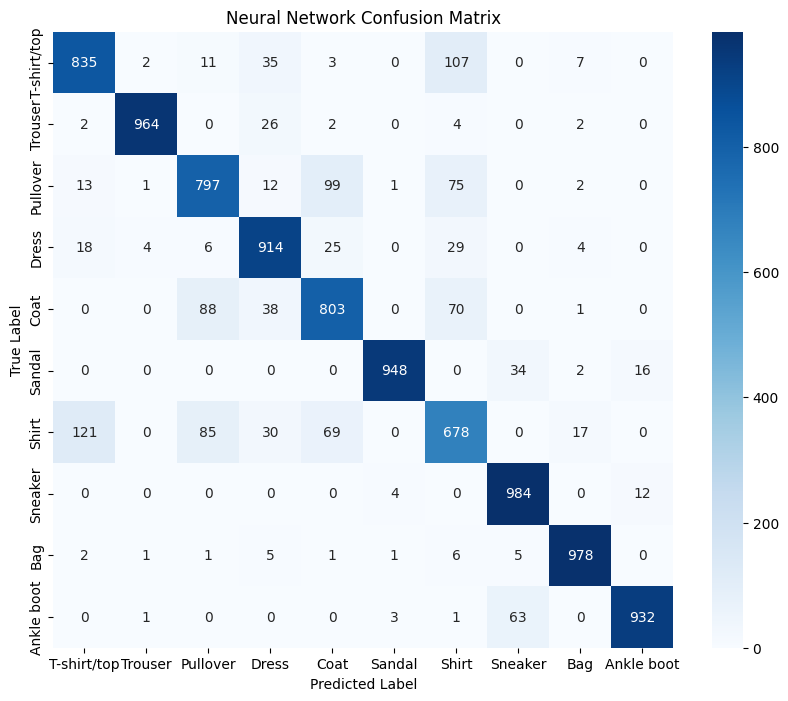


Neural Network Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.81      0.80      0.80      1000
       Dress       0.86      0.91      0.89      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.70      0.68      0.69      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the NN model
nn_predictions = nn_model.predict(x_test_nn)
nn_predicted_classes = np.argmax(nn_predictions, axis=1)

# Generate confusion matrix
nn_confusion_matrix = confusion_matrix(y_test, nn_predicted_classes)

# Display confusion matrix as an image
plt.figure(figsize=(10, 8))
sns.heatmap(nn_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Generate classification report
nn_classification_report = classification_report(y_test, nn_predicted_classes, target_names=class_names)
print("\nNeural Network Classification Report:")
print(nn_classification_report)

### Subtask:
Visualize some predicted labels from the NN model and compare them to the true labels.

**Reasoning**:
Visualize some predicted labels from the NN model to understand its performance on individual images. This involves selecting a subset of test images, getting the model's predictions, and displaying the images with both the predicted and true labels.

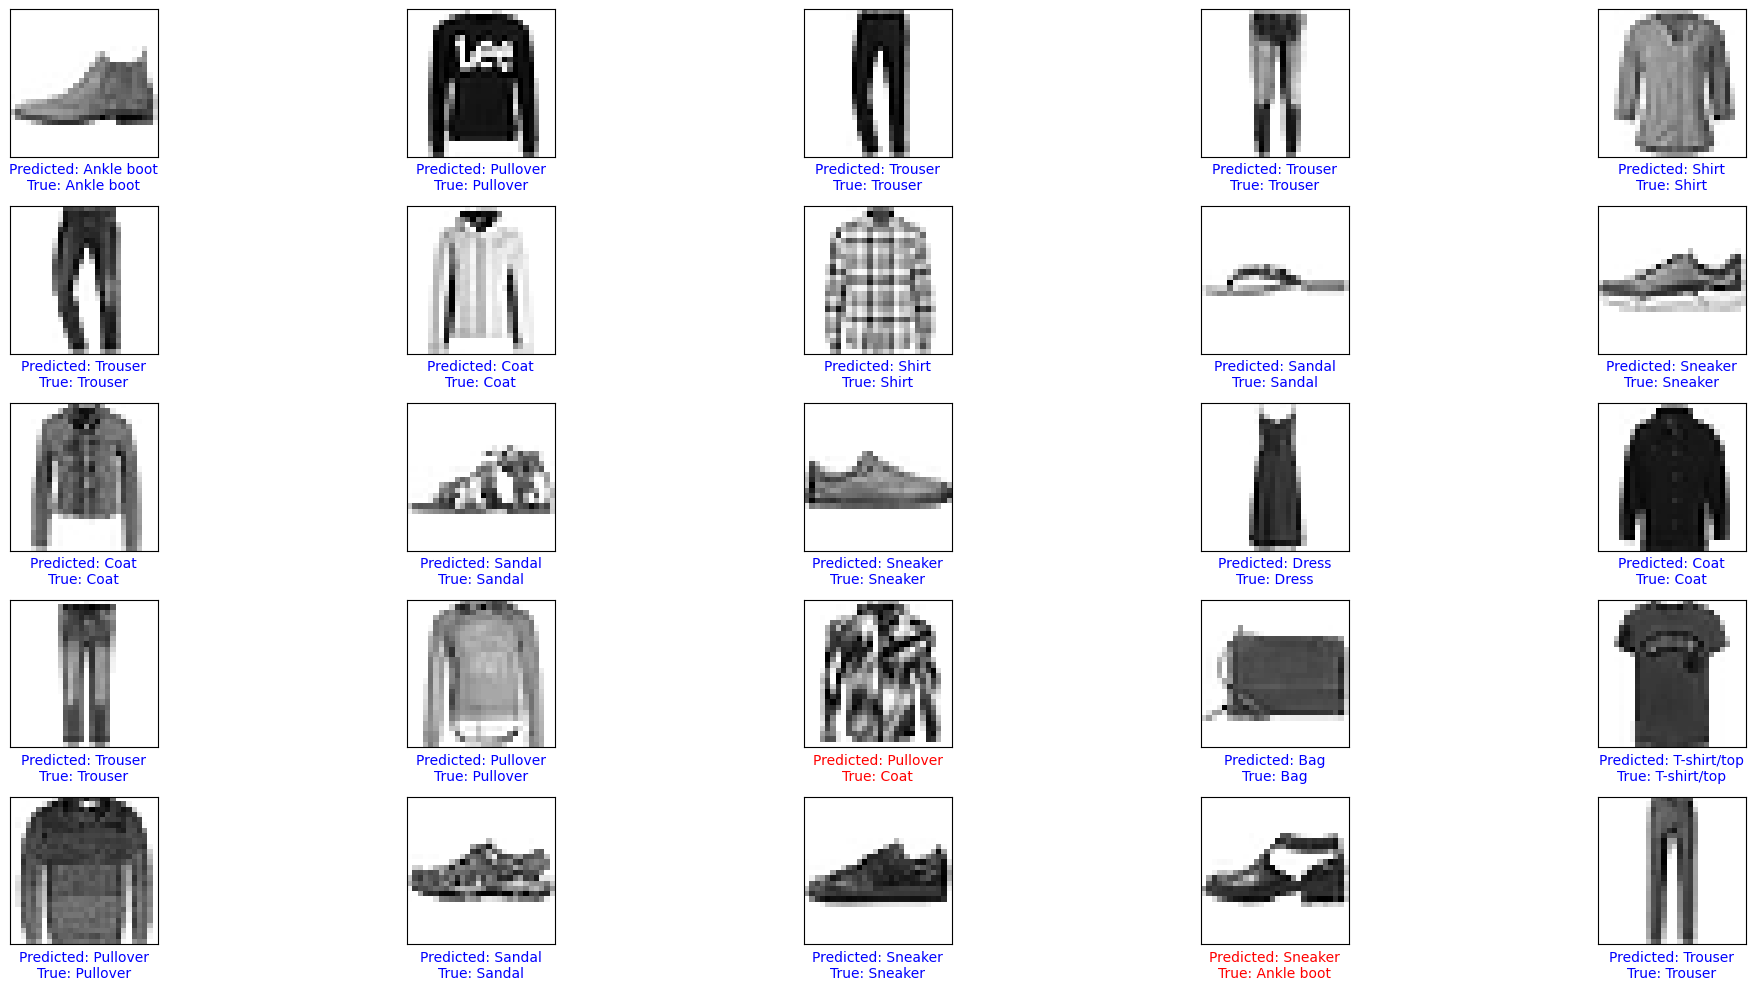

In [39]:
# Visualize some predictions
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(x_test_normalized[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

    predicted_label = class_names[nn_predicted_classes[i]]
    true_label = class_names[y_test[i]]

    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()

## Build and train the CNN model

### Subtask:
Define, compile, and train a Convolutional Neural Network model on the preprocessed data.

**Reasoning**:
Now I will define, compile, and train the Convolutional Neural Network model as per the instructions. This involves creating a `Sequential` model with `Conv2D`, `MaxPooling2D`, and `Flatten` layers to handle the image data's spatial structure, followed by `Dense` layers for classification. The model will then be compiled with the 'adam' optimizer and 'categorical_crossentropy' loss function, and trained on the preprocessed training data (`x_train_cnn`, `y_train_encoded`) and validated on the test data (`x_test_cnn`, `y_test_encoded`). The training history will be stored for later visualization and analysis.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 9, 9, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,242 (497.04 KB)

 Trainable params: 127,242 (497.04 KB)

 Non-trainable params: 0 (0.00 B)

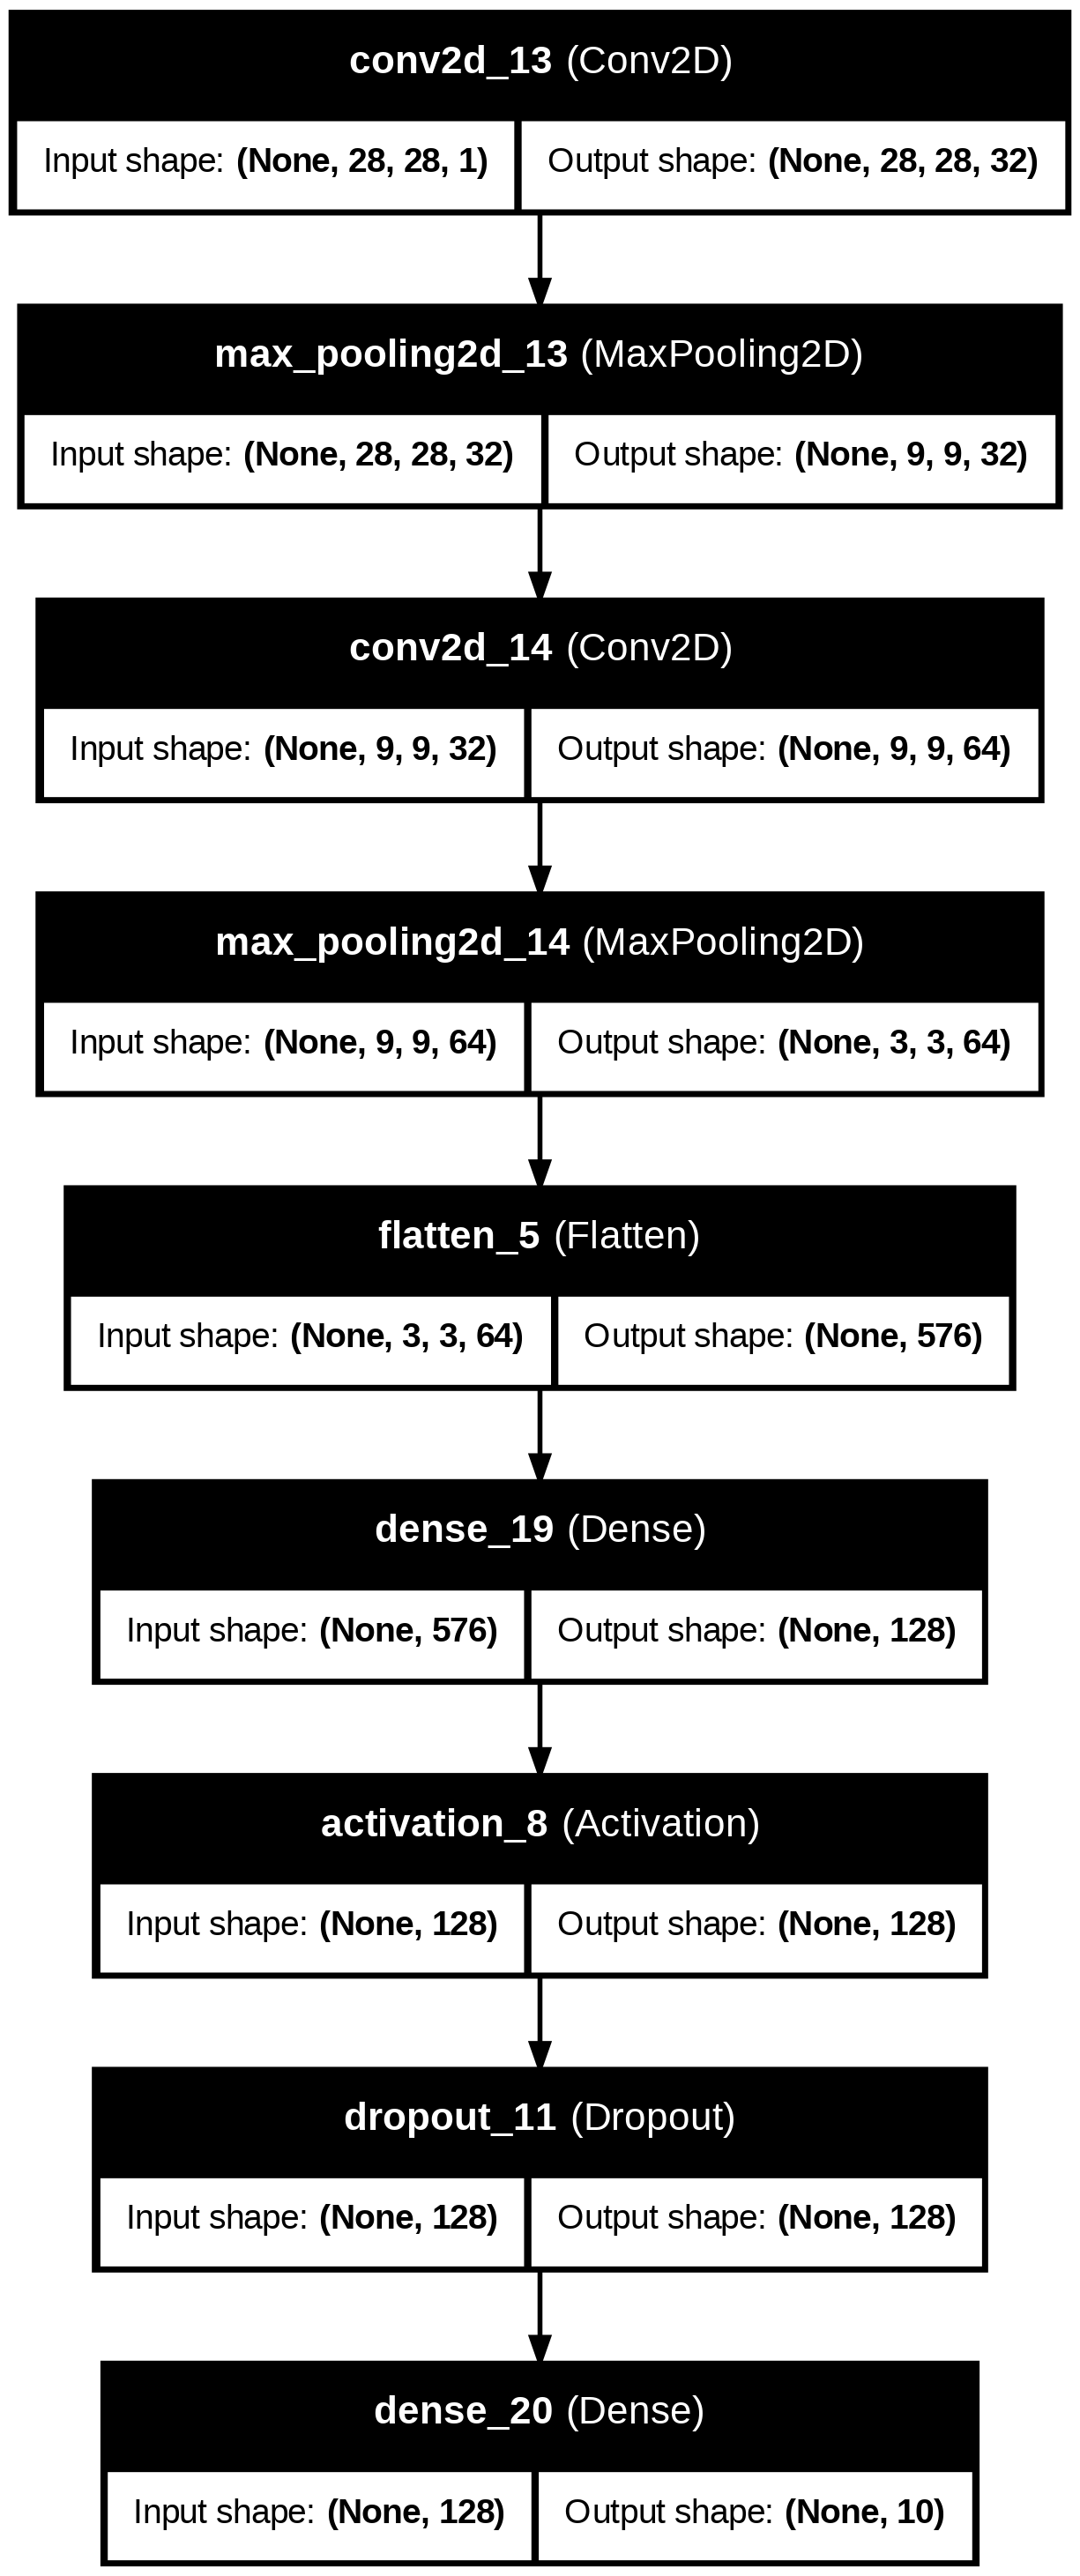

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization, Dropout, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    # Dropout(0.2),

    Conv2D(64, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((3, 3)),
    # Dropout(0.2),

    # Conv2D(128, (5, 5), activation='relu', padding='same'),
    # MaxPooling2D((3, 3)),
    # Dropout(0.2),

    Flatten(),
    Dense(128),
    # BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

# Plot the CNN model
plot_model(cnn_model, show_shapes=True, show_layer_names=True)



In [65]:
# Train the model
cnn_history = cnn_model.fit(x_train_cnn, y_train_encoded,
                            epochs=15,
                            batch_size=64,
                            validation_split=0.2)

print("\nConvolutional Neural Network model training complete.")

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 73s 96ms/step - accuracy: 0.6480 - loss: 0.9604 - val_accuracy: 0.8388 - val_loss: 0.4280
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 93ms/step - accuracy: 0.8416 - loss: 0.4515 - val_accuracy: 0.8734 - val_loss: 0.3414
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.8696 - loss: 0.3649 - val_accuracy: 0.8840 - val_loss: 0.3113
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.8828 - loss: 0.3322 - val_accuracy: 0.8982 - val_loss: 0.2772
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 98ms/step - accuracy: 0.8916 - loss: 0.3041 - val_accuracy: 0.8997 - val_loss: 0.2756
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.8993 - loss: 0.2824 - val_accuracy: 0.9067 - val_loss: 0.2569
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 98ms/step - accuracy: 0.9067 - loss: 0.2617 - val_accuracy: 0.9093 - val_loss: 0.2479
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.9099 - loss: 0.2485 - 

In [66]:
# Evaluate the model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test_cnn, y_test_encoded)
print(f"Convolutional Neural Network model test loss: {cnn_test_loss}")
print(f"Convolutional Neural Network model test accuracy: {cnn_test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9134 - loss: 0.2667
Convolutional Neural Network model test loss: 0.25787460803985596
Convolutional Neural Network model test accuracy: 0.9144999980926514


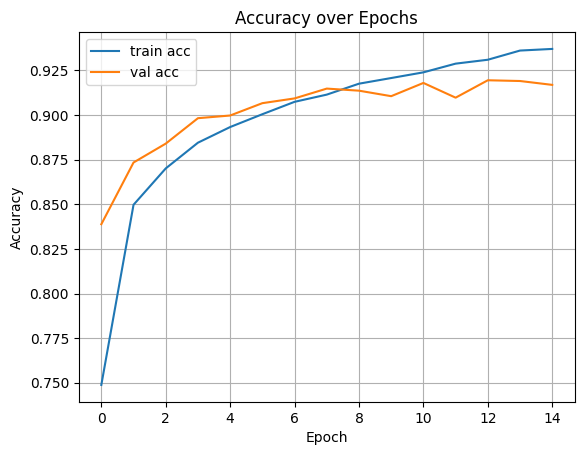

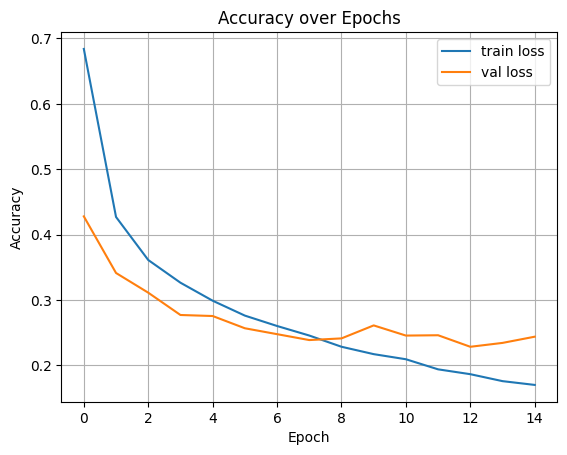

In [67]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


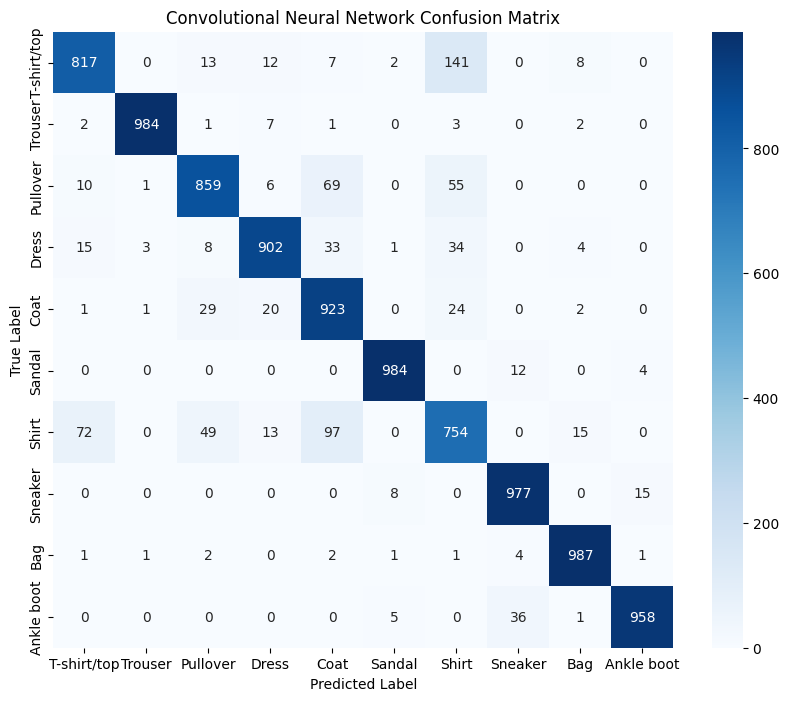


Convolutional Neural Network Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.82      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.86      0.88      1000
       Dress       0.94      0.90      0.92      1000
        Coat       0.82      0.92      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.75      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the CNN model
cnn_predictions = cnn_model.predict(x_test_cnn)
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)

# Generate confusion matrix
cnn_confusion_matrix = confusion_matrix(y_test, cnn_predicted_classes)

# Display confusion matrix as an image
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Convolutional Neural Network Confusion Matrix')
plt.show()

# Generate classification report
cnn_classification_report = classification_report(y_test, cnn_predicted_classes, target_names=class_names)
print("\nConvolutional Neural Network Classification Report:")
print(cnn_classification_report)

### Subtask:
Visualize some predicted labels from the CNN model and compare them to the true labels.

**Reasoning**:
Visualize some predicted labels from the CNN model to understand its performance on individual images. This involves selecting a subset of test images, getting the model's predictions, and displaying the images with both the predicted and true labels.

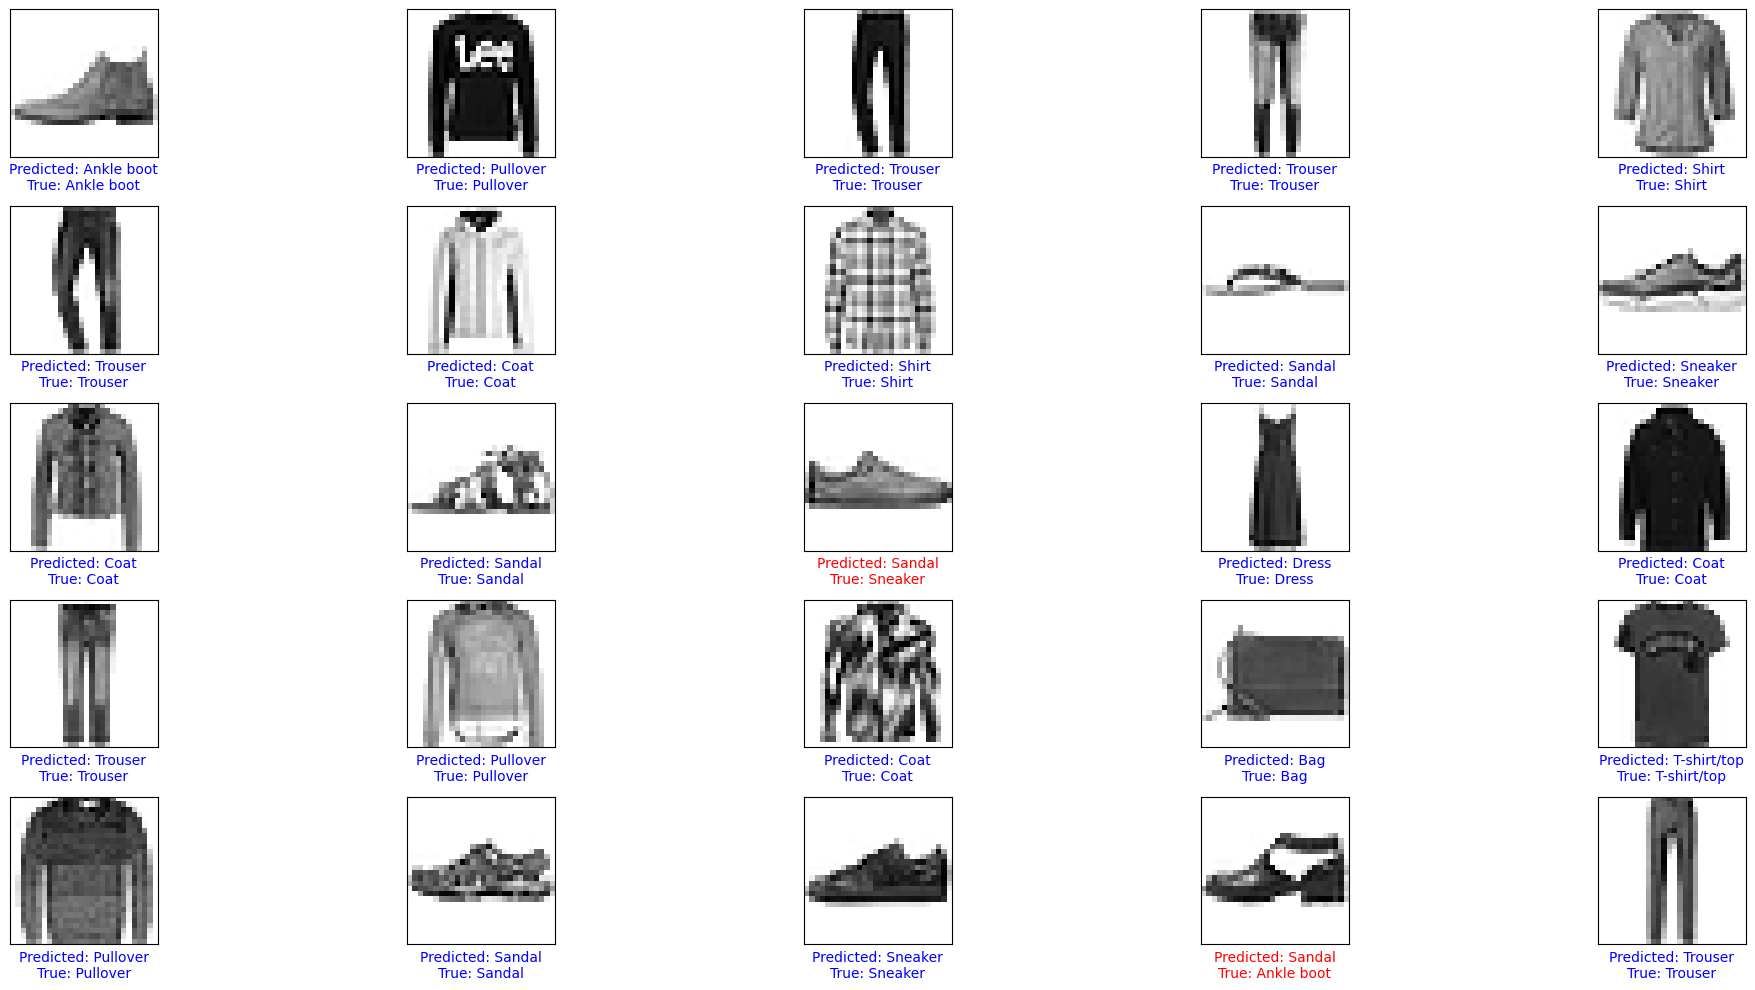

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize some predictions for CNN model
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(x_test_normalized[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

    predicted_label = class_names[cnn_predicted_classes[i]]
    true_label = class_names[y_test[i]]

    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)

plt.tight_layout()
plt.show()

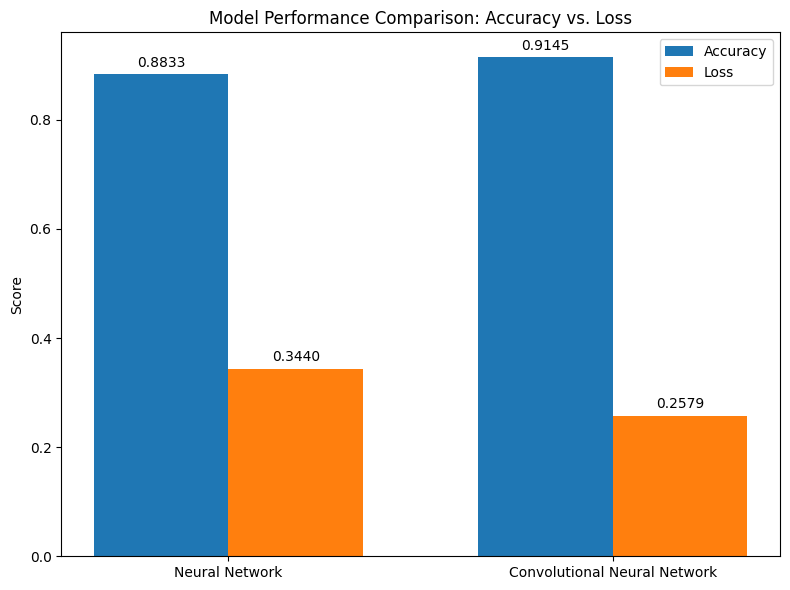

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their test accuracies and losses
model_names = ['Neural Network', 'Convolutional Neural Network']
accuracies = [nn_test_accuracy, cnn_test_accuracy]
losses = [nn_test_loss, cnn_test_loss]

x = np.arange(len(model_names)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, losses, width, label='Loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: Accuracy vs. Loss')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [71]:
percentage_improvement = ((cnn_test_accuracy - nn_test_accuracy) / nn_test_accuracy) * 100
print(f"The CNN model performed better than the NN model by approximately {percentage_improvement:.2f}% in terms of test accuracy.")

The CNN model performed better than the NN model by approximately 3.53% in terms of test accuracy.
